In [1]:
#Word clound

import urllib.request

response = urllib.request.urlopen('http://python.org')
html = response.read()

print(html)
print(len(html))

b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <script defer data-domain="python.org" src="https://analytics.python.org/js/script.outbound-links.js"></script>\n\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta nam

In [3]:
from bs4 import BeautifulSoup
htm_content = html.decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
clean_text = soup.get_text()
# print(clean_text[:1000])
# print(soup.prettify())
# htm_content = html.decode('utf-8')
# print(clean_text)

tokens = [tok for tok in clean_text.split()]
tokens = [tok.lower() for tok in tokens]
print(tokens[:100])

['welcome', 'to', 'python.org', 'notice:', 'while', 'javascript', 'is', 'not', 'essential', 'for', 'this', 'website,', 'your', 'interaction', 'with', 'the', 'content', 'will', 'be', 'limited.', 'please', 'turn', 'javascript', 'on', 'for', 'the', 'full', 'experience.', 'skip', 'to', 'content', '▼', 'close', 'python', 'psf', 'docs', 'pypi', 'jobs', 'community', '▲', 'the', 'python', 'network', 'donate', '≡', 'menu', 'search', 'this', 'site', 'go', 'a', 'a', 'smaller', 'larger', 'reset', 'socialize', 'linkedin', 'mastodon', 'chat', 'on', 'irc', 'twitter', 'about', 'applications', 'quotes', 'getting', 'started', 'help', 'python', 'brochure', 'downloads', 'all', 'releases', 'source', 'code', 'windows', 'macos', 'other', 'platforms', 'license', 'alternative', 'implementations', 'documentation', 'docs', 'audio/visual', 'talks', "beginner's", 'guide', "developer's", 'guide', 'faq', 'non-english', 'docs', 'pep', 'index', 'python', 'books', 'python', 'essays', 'community']


In [4]:
#get the frequencies of tokens
freq_dist = {}
for tok in tokens:
  if( tok in freq_dist):
    freq_dist[tok] += 1
  else:
    freq_dist[tok] = 1

print(freq_dist)
#

{'welcome': 1, 'to': 17, 'python.org': 1, 'notice:': 1, 'while': 3, 'javascript': 2, 'is': 9, 'not': 2, 'essential': 1, 'for': 13, 'this': 2, 'website,': 1, 'your': 6, 'interaction': 1, 'with': 7, 'the': 23, 'content': 2, 'will': 1, 'be': 3, 'limited.': 1, 'please': 1, 'turn': 1, 'on': 3, 'full': 1, 'experience.': 1, 'skip': 1, '▼': 1, 'close': 1, 'python': 48, 'psf': 9, 'docs': 6, 'pypi': 1, 'jobs': 2, 'community': 8, '▲': 3, 'network': 1, 'donate': 2, '≡': 1, 'menu': 1, 'search': 1, 'site': 1, 'go': 1, 'a': 11, 'smaller': 1, 'larger': 1, 'reset': 1, 'socialize': 1, 'linkedin': 1, 'mastodon': 1, 'chat': 1, 'irc': 3, 'twitter': 1, 'about': 5, 'applications': 3, 'quotes': 2, 'getting': 2, 'started': 3, 'help': 3, 'brochure': 2, 'downloads': 2, 'all': 4, 'releases': 2, 'source': 4, 'code': 6, 'windows': 2, 'macos': 2, 'other': 6, 'platforms': 2, 'license': 2, 'alternative': 2, 'implementations': 2, 'documentation': 3, 'audio/visual': 2, 'talks': 2, "beginner's": 2, 'guide': 6, "developer

<FreqDist with 531 samples and 1034 outcomes>
python 48
the 23
>>> 23
and 19
to 17
for 13
of 12
a 11
news 11
events 11


<Axes: xlabel='Samples', ylabel='Counts'>

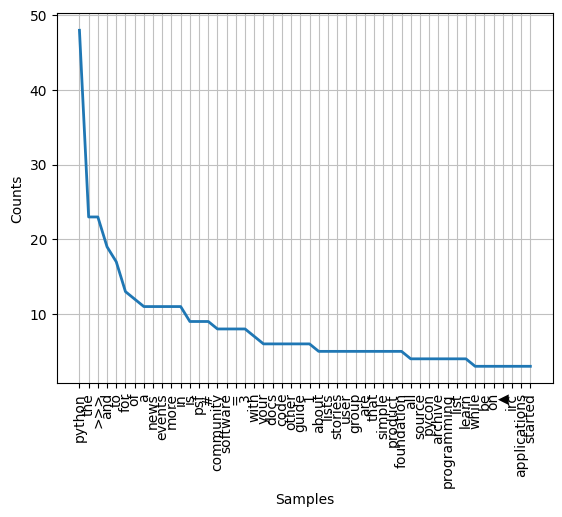

In [6]:
import nltk
freq_dist_nltk = nltk.FreqDist(tokens)
print(freq_dist_nltk)
for k,v in freq_dist_nltk.most_common(10):
  print(k,v)

freq_dist_nltk.plot(50, cumulative=False)

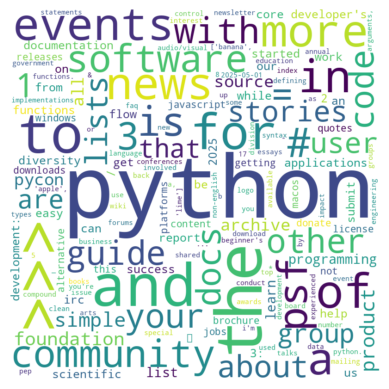

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq_dist = {word: freq for word, freq in freq_dist_nltk.items()}

wordcloud = WordCloud(width=800,height=800,background_color='white', min_font_size=14).generate_from_frequencies(word_freq_dist)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
#Test processing
import nltk
nltk.download('gutenberg')

nltk.corpus.gutenberg.fileids()



[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [9]:
from nltk.corpus import gutenberg
emma_text = gutenberg.raw('austen-emma.txt')
print(emma_text[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [10]:
#Split words by white space
words = emma_text.split()
print(words[:100])

['[Emma', 'by', 'Jane', 'Austen', '1816]', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse,', 'handsome,', 'clever,', 'and', 'rich,', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition,', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence;', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate,', 'indulgent', 'father;', 'and', 'had,', 'in', 'consequence', 'of', 'her', "sister's", 'marriage,', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period.', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses;']


In [11]:
import re
words = re.split(r'\W+', emma_text)
print(words)

['', 'Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sister', 's', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess', 'who', 'had', 'fallen', 'l

In [12]:
import string
print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
words = emma_text.split()
# remove the punctuations of words
words = [word for word in words if word not in string.punctuation]
# print(words)

#Use transitions table
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
words = [re_punc.sub('', w) for w in words]
print(words)


['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twentyone', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sisters', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess', 'who', 'had', 'fallen', 'little', 'sho

In [14]:
words = emma_text.split()
words = [word.lower() for word in words]
print(words)

['[emma', 'by', 'jane', 'austen', '1816]', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse,', 'handsome,', 'clever,', 'and', 'rich,', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition,', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence;', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her.', 'she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate,', 'indulgent', 'father;', 'and', 'had,', 'in', 'consequence', 'of', 'her', "sister's", 'marriage,', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period.', 'her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses;', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess,', 'who', 'had', 'falle

In [15]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
# Text proccessing using nltk library
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(emma_text)
print(sentences[0])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.


In [ ]:
from nltk.tokenize import word_tokenize
words = word_tokenize(emma_text)
print(words[:100])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'s", 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'Her', 'mother', 'had', 'died']


In [17]:
clean_words = [word.lower() for word in words if word.isalpha()]
# print(clean_words[:100])
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
clean_words = [word for word in clean_words if not word in stop_words]
print(clean_words[:100])


['jane', 'austen', 'volume', 'chapter', 'emma', 'comfortable', 'home', 'happy', 'seemed', 'unite', 'best', 'blessings', 'lived', 'nearly', 'years', 'world', 'little', 'distress', 'vex', 'youngest', 'two', 'daughters', 'indulgent', 'consequence', 'mistress', 'house', 'early', 'mother', 'died', 'long', 'ago', 'indistinct', 'remembrance', 'place', 'supplied', 'excellent', 'woman', 'fallen', 'little', 'short', 'mother', 'sixteen', 'years', 'miss', 'taylor', 'less', 'governess', 'fond', 'particularly', 'intimacy', 'even', 'miss', 'taylor', 'ceased', 'hold', 'nominal', 'office', 'mildness', 'temper', 'hardly', 'allowed', 'impose', 'shadow', 'authority', 'long', 'passed', 'living', 'together', 'friend', 'friend', 'mutually', 'emma', 'highly', 'esteeming', 'miss', 'directed', 'chiefly', 'real', 'situation', 'power', 'rather', 'much', 'disposition', 'think', 'little', 'well', 'disadvantages', 'threatened', 'alloy', 'many', 'present', 'means', 'rank', 'misfortunes', 'sorrow', 'gentle', 'shape', 

In [18]:
from nltk.probability import FreqDist
fdist = FreqDist(clean_words)
print(fdist.most_common(50))

[('could', 800), ('would', 795), ('miss', 568), ('must', 543), ('emma', 481), ('much', 427), ('every', 425), ('said', 392), ('one', 377), ('little', 346), ('think', 342), ('never', 330), ('might', 316), ('thing', 288), ('quite', 270), ('good', 264), ('great', 253), ('always', 231), ('harriet', 224), ('weston', 219), ('know', 219), ('without', 211), ('shall', 210), ('may', 210), ('say', 209), ('jane', 199), ('nothing', 199), ('see', 198), ('thought', 197), ('soon', 193), ('made', 189), ('young', 186), ('knightley', 184), ('like', 180), ('frank', 178), ('time', 177), ('elton', 174), ('well', 171), ('first', 166), ('ever', 163), ('though', 162), ('sure', 157), ('two', 151), ('make', 146), ('give', 145), ('dear', 145), ('really', 144), ('upon', 140), ('seemed', 138), ('cannot', 136)]


<Axes: xlabel='Samples', ylabel='Counts'>

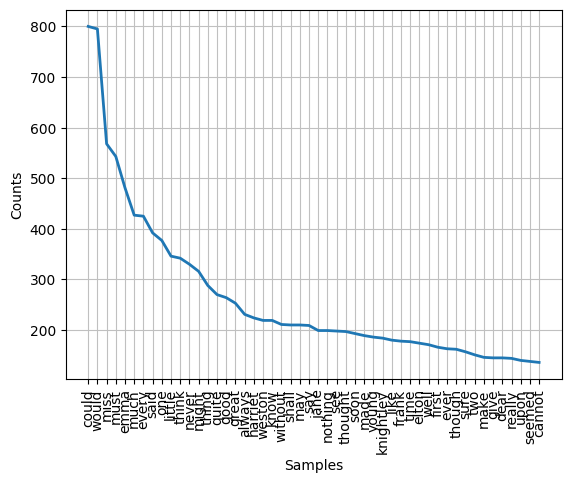

In [19]:
fdist.plot(50, cumulative=False)

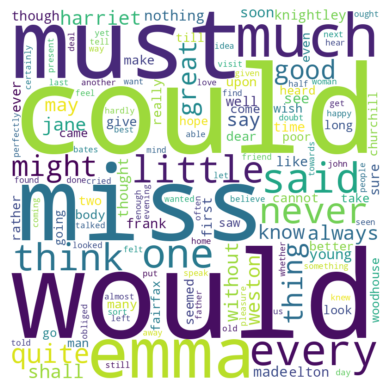

In [20]:
wordcloud = WordCloud(width=800,height=800,background_color='white', min_font_size=14).generate_from_frequencies(fdist)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
stop_words = set(stopwords.words('english'))
stop_words.update(['could','would'])
custom_stop_words = [word for word in clean_words if not word in stop_words]
print(custom_stop_words[:100])


['jane', 'austen', 'volume', 'chapter', 'emma', 'comfortable', 'home', 'happy', 'seemed', 'unite', 'best', 'blessings', 'lived', 'nearly', 'years', 'world', 'little', 'distress', 'vex', 'youngest', 'two', 'daughters', 'indulgent', 'consequence', 'mistress', 'house', 'early', 'mother', 'died', 'long', 'ago', 'indistinct', 'remembrance', 'place', 'supplied', 'excellent', 'woman', 'fallen', 'little', 'short', 'mother', 'sixteen', 'years', 'miss', 'taylor', 'less', 'governess', 'fond', 'particularly', 'intimacy', 'even', 'miss', 'taylor', 'ceased', 'hold', 'nominal', 'office', 'mildness', 'temper', 'hardly', 'allowed', 'impose', 'shadow', 'authority', 'long', 'passed', 'living', 'together', 'friend', 'friend', 'mutually', 'emma', 'highly', 'esteeming', 'miss', 'directed', 'chiefly', 'real', 'situation', 'power', 'rather', 'much', 'disposition', 'think', 'little', 'well', 'disadvantages', 'threatened', 'alloy', 'many', 'present', 'means', 'rank', 'misfortunes', 'sorrow', 'gentle', 'shape', 

In [22]:
#Convert documents into matrix form
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)


In [23]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
input = ["the dog sat on the floor", "the man sat on the floor", "the man walked his dog"]
vectorizer.fit(input)
print(vectorizer.vocabulary_)

{'the': 6, 'dog': 0, 'sat': 5, 'on': 4, 'floor': 1, 'man': 3, 'walked': 7, 'his': 2}


In [24]:
vcector = vectorizer.transform(input)
print(vcector.toarray())

[[1 1 0 0 1 1 2 0]
 [0 1 0 1 1 1 2 0]
 [1 0 1 1 0 0 1 1]]


In [25]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
input = ["the dog sat on the floor", "the man sat on the floor", "the man walked his dog"]
vectorizer.fit(input)
# print(vectorizer.vocabulary_)
print(vectorizer.idf_)
vcector = vectorizer.transform(input)
print(vcector.toarray())

[1.28768207 1.28768207 1.69314718 1.28768207 1.28768207 1.28768207
 1.         1.69314718]
[[0.39490346 0.39490346 0.         0.         0.39490346 0.39490346
  0.61335554 0.        ]
 [0.         0.39490346 0.         0.39490346 0.39490346 0.39490346
  0.61335554 0.        ]
 [0.40619178 0.         0.53409337 0.40619178 0.         0.
  0.31544415 0.53409337]]


In [26]:
#Example 01
from google.colab import files
import pandas as pd
news = pd.read_csv('trainset.txt', sep='\t', names=['CLASS','TITLE','DATE','BODY'])
# news.head()

texts = news['BODY']
label = news['CLASS']

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X1 = vectorizer.fit_transform(texts)
# print(X.toarray())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, label, test_size=0.33)
#Model a dission tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
#plot the dession tree
from sklearn import tree
# tree.plot_tree(clf, filled=True)

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



#try multinomial classification
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
#classification report
y_pred = clf.predict(X_test)
#print(classification_report(y_test, y_pred))

FileNotFoundError: [Errno 2] No such file or directory: 'trainset.txt'

In [27]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#PorterStemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('running'))
print(stemmer.stem('runs'))
print(stemmer.stem('ran'))

run
run
ran


In [ ]:
import nltk
nltk.download('wordnet')

#WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('running', pos='v'))
print(lemmatizer.lemmatize('runs', pos='v'))
print(lemmatizer.lemmatize('ran', pos='v'))

run
run
run


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Session 09

In [ ]:
#Example 02
#Use tf-idf

from google.colab import files
import pandas as pd
news = pd.read_csv('trainset.txt', sep='\t', names=['CLASS','TITLE','DATE','BODY'])
# news.head()

texts = news['BODY']
label = news['CLASS']

# Convert to the matrix form using the tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)



In [ ]:
X.shape

(200, 4909)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.33)

#Model a dission tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
#plot the dession tree
from sklearn import tree
#tree.plot_tree(clf, filled=True)

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[23  8]
 [ 4 31]]
              precision    recall  f1-score   support

          -1       0.85      0.74      0.79        31
           1       0.79      0.89      0.84        35

    accuracy                           0.82        66
   macro avg       0.82      0.81      0.82        66
weighted avg       0.82      0.82      0.82        66



In [ ]:
# Use multinomialNm
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
#classification report
y_pred = clf.predict(X_test)

# plot
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.94      1.00      0.97        32
           1       1.00      0.94      0.97        34

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



(200, 2)


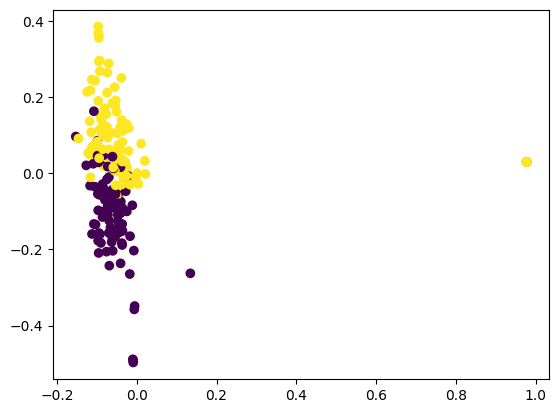

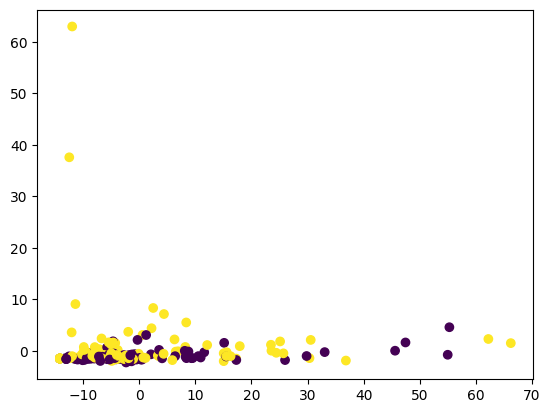

In [ ]:
# Use of PCA as a visualization technique
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

#Plot PC1 Vs PC2 with different colors
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1], c=label)
#plt.plot(X_pca[:,0], X_pca[:,1], 'ro')
plt.show()

pca1 = PCA(n_components=2)
X1_pca = pca1.fit_transform(X1)
# Scatter plot on X1_pca with different colors
plt.scatter(X1_pca[:,0], X1_pca[:,1], c=label)
plt.show()


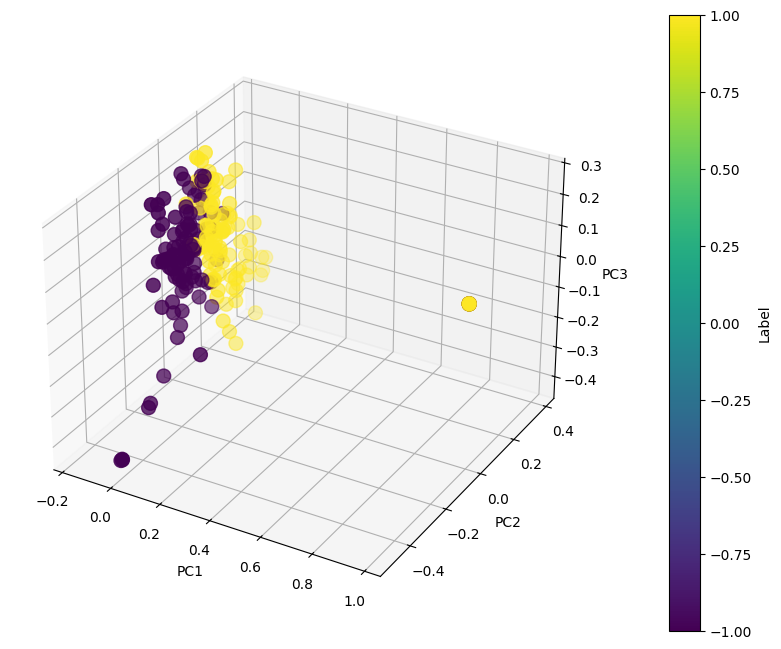

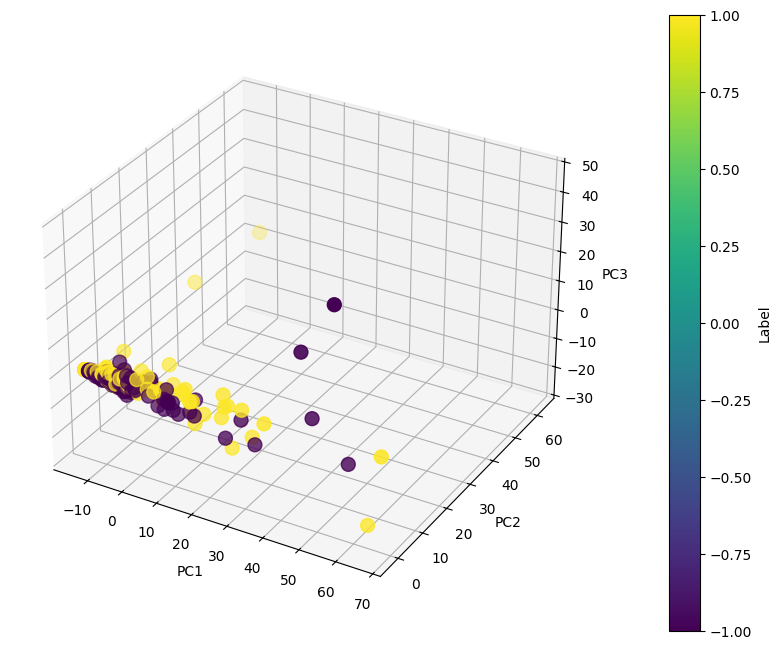

In [ ]:
# use X and plot 3D based on the 3 PCAs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Use 3 PCAs
pca = PCA(n_components=3)
Xn_pca = pca.fit_transform(X)

fig = plt.figure( figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Xn_pca[:,0], Xn_pca[:,1], Xn_pca[:,2], c=label, cmap='viridis', s=100)

# Add color bar
plt.colorbar(scatter, ax=ax, pad = 0.1, label='Label')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.grid(True)
plt.show()


# Use 3 PCAs
pca = PCA(n_components=3)
Xb_pca = pca.fit_transform(X1)

fig = plt.figure( figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Xb_pca[:,0], Xb_pca[:,1], Xb_pca[:,2], c=label, cmap='viridis', s=100)

# Add color bar
plt.colorbar(scatter, ax=ax, pad = 0.1, label='Label')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.grid(True)
plt.show()

In [ ]:
# Session 10 ( Feature selection)
